In [1]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import numpy as np
import astropy.units as u

In [2]:
problem = '5024414'

In [3]:
NGC_6819_kics = [problem]

In [4]:
lcs = {}
qs = [2,3,4,5,7,8,9,11,12,13,15,16,17] # Need to leave out blank quarters i.e., 6, 10, ...
for idx, target in enumerate(NGC_6819_kics):
    print(idx, str(target))
    lc = search_lightcurvefile(target, quarter=1).download().PDCSAP_FLUX
    for q in qs:
        try:
            lc = lc.append(search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX)
        except:
            print(f'{target} : {q} did not work!')
    lcs[str(target)] = lc

0 5024414


In [5]:
corr_lcs = {}
for k,v in lcs.items():
    print(k,v)
    corr_lcs[k] = v.normalize().remove_nans().flatten(window_length=101).remove_outliers()

5024414 KeplerLightCurve(ID: 5024414)


In [6]:
snr = {}
for k,v in corr_lcs.items():
    snr[k] = v.to_periodogram(freq_unit=u.microHertz, normalization='psd', 
                            maximum_frequency=288, minimum_frequency=1).flatten()

(<Quantity 6.61463216 uHz>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8a1de76d30>)

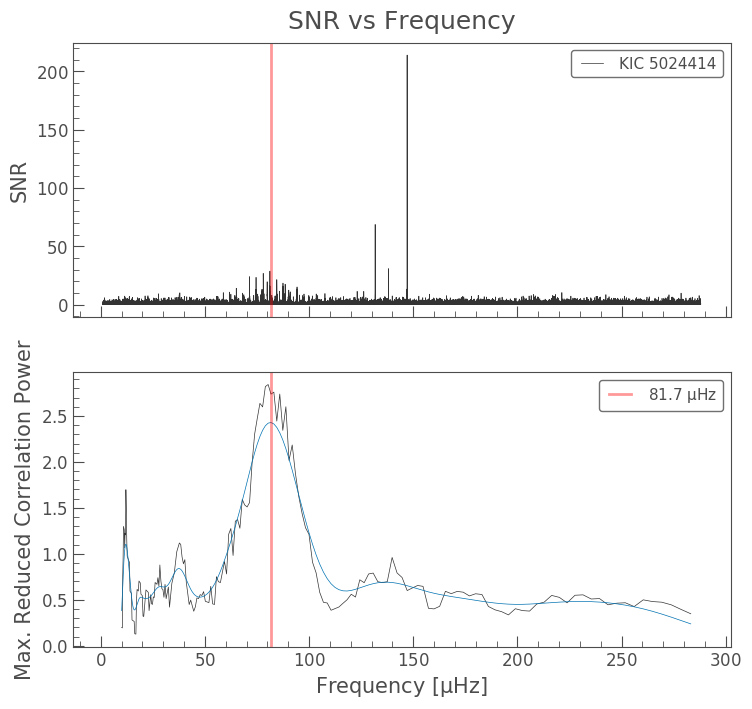

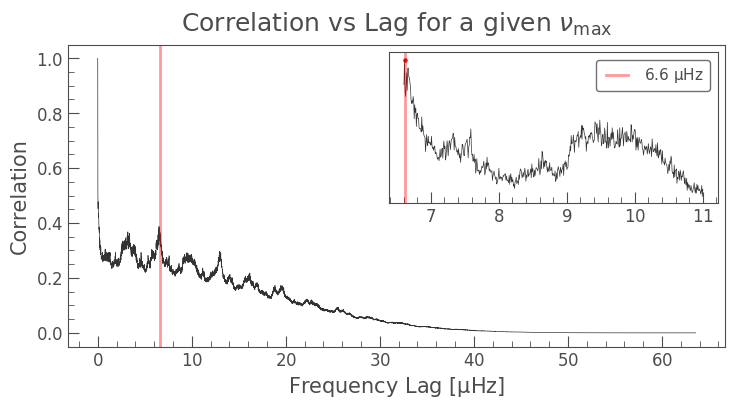

In [7]:
snr[problem].estimate_numax(show_plots=True)
snr[problem].estimate_dnu(show_plots=True)

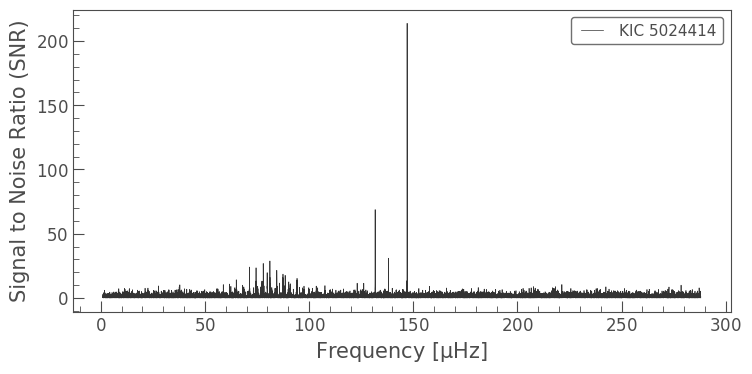

In [8]:
a = snr[problem]
a.plot()
fs = np.median(np.diff(a.frequency.value))

In [9]:
acf1 = a._autocorrelate(25.)
acf2 = a._autocorrelate(80.)
acf3 = a._autocorrelate(140.)
acf4 = a._autocorrelate(250.)

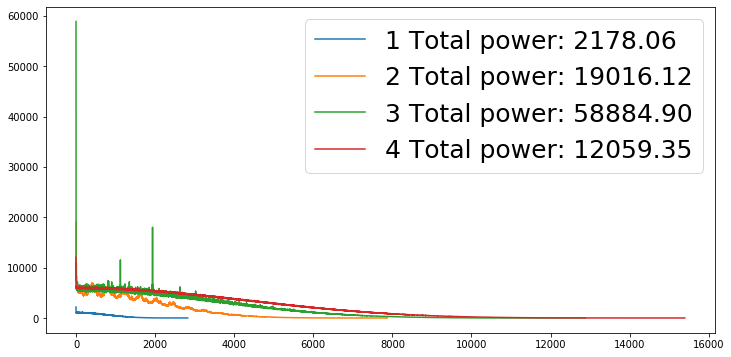

In [10]:
import pylab as plt
fig = plt.figure(figsize=(12,6))
plt.plot(acf1, label='1 Total power: {:.2f}'.format(np.nanmax(acf1)))
plt.plot(acf2, label='2 Total power: {:.2f}'.format(np.nanmax(acf2)))
plt.plot(acf3, label='3 Total power: {:.2f}'.format(np.nanmax(acf3)))
plt.plot(acf4, label='4 Total power: {:.2f}'.format(np.nanmax(acf4)))
plt.legend(fontsize=25)
plt.show()